### ECE 475 Freq Machine Learning Example 7.10.2

#### Wrong and Right way to do Cross Validation

Jing Jiang

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import *
from sklearn.metrics import *
import random

In [302]:
np.random.seed(12)
num_preds = 5000

x = []
for n in range(num_preds):
    x.append(np.random.normal(0, 0.1, 50).astype(np.float32))

x1 = np.asarray(x)
x1 = np.transpose(x1)
y1 = np.hstack((np.zeros(25),np.ones(25)))
random.shuffle(y1)

df = pd.DataFrame(x1)
df['target'] = y1
df.shape

(50, 5001)

### The Wrong Way

In [280]:
corr2 = df.corr()['target'][df.corr()['target'] < 1]
corr = corr2.abs().sort_values(ascending=False)

corr.head()

734     0.533522
1022    0.521323
513     0.477817
3309    0.472461
722     0.469705
Name: target, dtype: float64

In [296]:
features = corr.index[[range(100)]].values

training_input  = df[features].values
training_output = df['target']
logreg = LogisticRegression()
mse_estimate = -1 * cross_val_score(logreg,training_input,training_output,cv=10,scoring='neg_mean_squared_error')

In [295]:
pd.DataFrame(mse_estimate).mean()

0    0.075
dtype: float64

As mentioned in the book, the true error rate of any classifier is 50%. Using the wrong way, we get 7.5%.

(array([ 4., 11., 18., 24., 18., 12.,  7.,  6.]),
 array([-0.6778734 , -0.50590463, -0.33393586, -0.16196709,  0.01000168,
         0.18197045,  0.35393922,  0.525908  ,  0.69787677]),
 <a list of 8 Patch objects>)

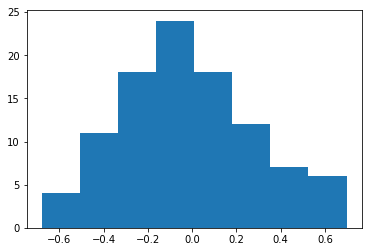

In [334]:
df_elements = df.sample(n=10)
corr3 = df_elements.corr()['target'][df.corr()['target'] < 1]
plt.hist(corr3[features], bins='auto')

Using the wrong way, the histogram of correlation does not averages at 0.

### The Right Way

In [284]:
kf = StratifiedKFold (df['target'], n_folds=10)
mse = []
fold_count = 0
for train, test in kf:
    train_fold = df.iloc[train]
    test_fold = df.iloc[test]
    
    corr2 = train_fold.corr()['target'][train_fold.corr()['target'] < 1]
    corr = corr2.abs().sort_values(ascending=False)
    features = corr.index[[range(100)]].values
    
    train_fold_input  = train_fold[features].values
    train_fold_output = train_fold['target']
    
    logreg = LogisticRegression()
    logreg.fit(train_fold_input, train_fold_output)
    
    pred = logreg.predict(test_fold[features])
    mse.append(mean_squared_error(test_fold.target, pred))
    
    fold_count += 1


In [285]:
pd.DataFrame(mse).mean()

0    0.516667
dtype: float64

As mentioned in the book, the true error rate of any classifier is 50%. Using the right way, we get 51.7%.

(array([ 3.,  5., 13., 16., 25., 17., 12.,  6.,  3.]),
 array([-0.39117692, -0.30386776, -0.2165586 , -0.12924943, -0.04194027,
         0.04536889,  0.13267805,  0.21998721,  0.30729638,  0.39460554]),
 <a list of 9 Patch objects>)

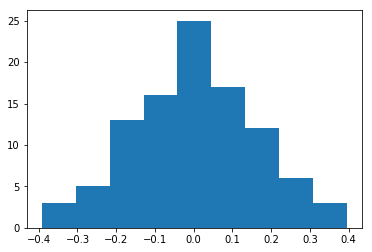

In [342]:
index = np.random.randint(0,5000,size=100)
plt.hist(corr2[index], bins='auto')

Using the right way, the histogram of correlation averages at 0.